In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def load_timings(csv_path):
    """Load the timings CSV into a pandas DataFrame."""
    df = pd.read_csv(csv_path)
    return df

def summarize_timings(df):
    """Print summary statistics for each algorithm and plot mean timings."""
    summary = df.groupby(['vertices', 'edges', 'bmssp'])['elapsed_seconds'].agg(['mean', 'std', 'min', 'max', 'count'])
    print(summary)
    return summary

def plot_mean_timings(df):
    """Plot mean elapsed time vs. number of edges for each algorithm."""
    df = df[df['vertices'] == 1000000]
    means = df.groupby(['edges', 'bmssp'])['elapsed_seconds'].mean().reset_index()
    for bmssp_val in means['bmssp'].unique():
        subset = means[means['bmssp'] == bmssp_val]
        plt.plot(subset['edges'], subset['elapsed_seconds'], marker='o', label=f'bmssp={bmssp_val}')
    plt.xlabel('Number of edges')
    plt.ylabel('Mean elapsed time (s)')
    plt.title('Mean elapsed time vs. edges')
    plt.legend()
    plt.show()

def plot_boxplot(df):
    """Boxplot of timings for each algorithm and edge count."""
    df['bmssp'] = df['bmssp'].astype(str)
    plt.figure(figsize=(12,6))
    df.boxplot(column='elapsed_seconds', by=['edges', 'bmssp'])
    plt.ylabel('Elapsed time (s)')
    plt.title('Timing distribution by edges and algorithm')
    plt.suptitle('')
    plt.show()

                             mean       std       min       max  count
vertices edges    bmssp                                               
1000000  1000000  False  0.024601  0.007443  0.011236  0.039933    250
                  True   0.025044  0.007610  0.011869  0.050286    250
         2000000  False  0.024984  0.007218  0.013014  0.036913    250
                  True   0.024743  0.007667  0.011726  0.040898    250
         3000000  False  0.025065  0.007274  0.011112  0.050425    250
                  True   0.024892  0.007887  0.009529  0.046547    250
         4000000  False  0.025572  0.007421  0.012141  0.041126    250
                  True   0.025176  0.008219  0.011620  0.049459    250
         5000000  False  0.028187  0.007678  0.008730  0.054231    250
                  True   0.026405  0.004992  0.013245  0.052475    250
         6000000  False  0.025963  0.007400  0.010934  0.049949    250
                  True   0.025840  0.007283  0.009224  0.057085    250
      

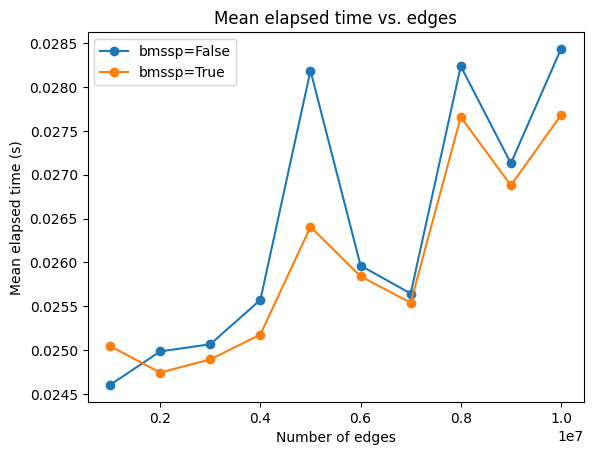

In [9]:
# Example usage:
df = load_timings('dijkstra_timings.csv')
summarize_timings(df)
plot_mean_timings(df)